<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/DeThi/Cau3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3: CNN (1.5 điểm)
- Choose a topic in classification (such as: brand classification, cosmetic classification, traditional costumes classification, healthy and unhealthy dishes classification...) => apply CNN to build a model to classify class of each sample.
## Note:
- Create dataset (like dog/cat dataset): with at least 2 classes, each class has at least 3000 training samples, 700 testing samples)

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [26]:
classes = ['Cockatoo', 'Macaw']

In [27]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=len(classes), activation='softmax'))

In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
trainning_set = train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/LDS8_K270_ONLINE_NguyenAnhDuy/Parrot_Dataset',
                                                  target_size=(64, 64),
                                                  classes=classes,
                                                  class_mode='categorical')

Found 1413 images belonging to 2 classes.


In [34]:
test_set = test_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/LDS8_K270_ONLINE_NguyenAnhDuy/Parrot_Dataset_Test',
                                            target_size=(64, 64),
                                            classes=classes,
                                            class_mode='categorical')

Found 337 images belonging to 2 classes.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
              ModelCheckpoint('model_cau_3.h5', save_best_only=True)]
history = classifier.fit(trainning_set, epochs=1, validation_data=test_set, callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/45 [==============================] - 21s 474ms/step - loss: 0.1891 - accuracy: 0.9327 - val_loss: 0.2582 - val_accuracy: 0.8509


In [36]:
history.history

{'accuracy': [0.9327195286750793],
 'loss': [0.18912957608699799],
 'val_accuracy': [0.8509091138839722],
 'val_loss': [0.25817155838012695]}

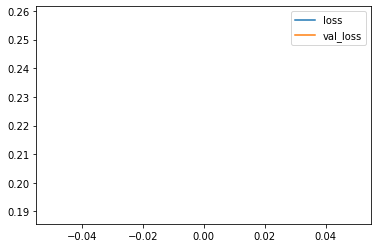

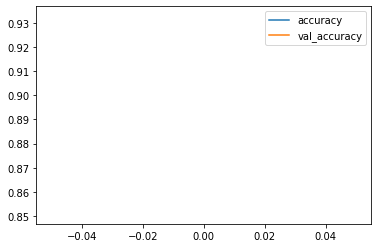

In [35]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

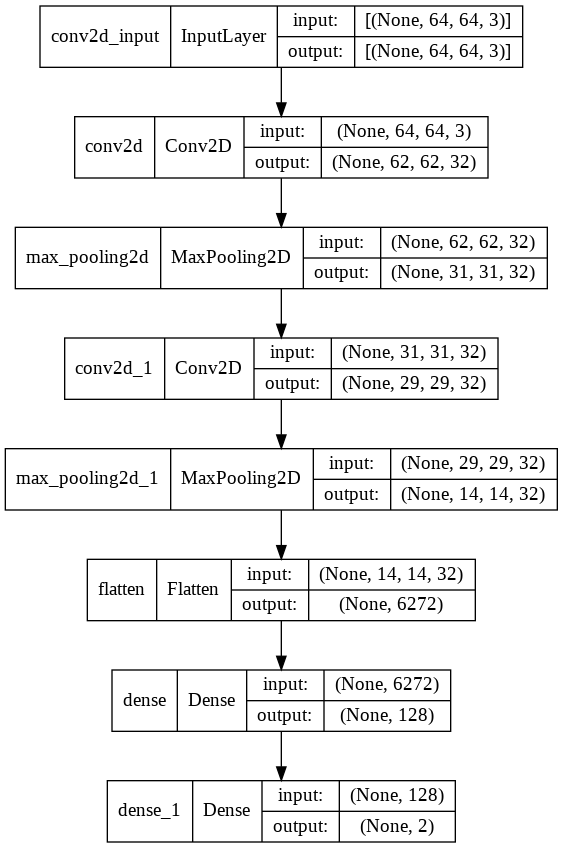

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, to_file='CNN_model.png', show_shapes=True)

In [23]:
from tensorflow.keras.models import load_model
classifier.save('cnn_model.h5')

def read_process_img(url):
  import matplotlib.pyplot as plt   
  plt.imshow(plt.imread(url, format='jpeg'))
  test_img = image.load_img(url, target_size=(64, 64))
  test_img = image.img_to_array(test_img) / 255
  return np.expand_dims(test_img, axis=0)

Saving blog_blue_gold_macaw_facts2.jpg to blog_blue_gold_macaw_facts2 (1).jpg
Macaw 1


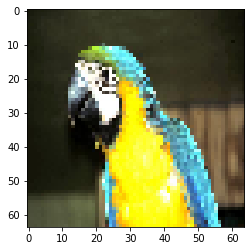

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, target_size=(64, 64))
  plt.imshow(img)
  test_img = image.img_to_array(img) / 255
  x = np.expand_dims(test_img, axis=0)

  images = np.vstack([x])
  result = classifier.predict(images, batch_size=10)
  
  index = np.argmax(result)
  print(classes[index], index)